In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #helps us to do regression
import statsmodels.formula.api as smf  #helps us to do regression
from sklearn.metrics import r2_score

In [10]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6E82-34BE

 Directory of C:\Users\KUMAR SANU\Assignment\Simple regression

24-02-2021  10:50    <DIR>          .
24-02-2021  10:50    <DIR>          ..
23-02-2021  10:51    <DIR>          .ipynb_checkpoints
24-02-2021  10:50            69,378 Delivery _ time.ipynb
22-02-2021  13:48               177 delivery_time.csv
24-02-2021  10:49           196,232 Salary.ipynb
22-02-2021  00:08               454 Salary_Data.csv
               4 File(s)        266,241 bytes
               3 Dir(s)  171,160,895,488 bytes free


In [11]:
dt=pd.read_csv('delivery_time.csv')

In [12]:
dt.head(10)

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
dt.tail(10)

,DT,ST
11,10.75,4
12,16.68,7
13,11.50,3
14,12.03,3
15,14.88,4
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [14]:
type(dt)

pandas.core.frame.DataFrame

In [15]:
dt.shape   #21 rows and 2 columns

(21, 2)

In [16]:
dt.dtypes #Types of data available in data

DT    float64
ST      int64
dtype: object

In [17]:
#No null value is present in the data and total 2 columns and 21 rows are present in the data.
dt.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# 1st business moments

In [ ]:
#Finding Mean.Median & Mode

In [18]:
dt.mean()

DT    16.790952
ST     6.190476
dtype: float64

In [19]:
dt.median()

DT    17.83
ST     6.00
dtype: float64

In [20]:
dt.mode()

,DT,ST
0,8.00,7.0
1,9.50,NaN
2,10.75,NaN
3,11.50,NaN
4,12.03,NaN
5,13.50,NaN
6,13.75,NaN
7,14.88,NaN
8,15.35,NaN
9,16.68,NaN


In [21]:
dt.var()

DT    25.754619
ST     6.461905
dtype: float64

In [22]:
dt.std() #If we see the differnce from mean delivery time has higher spread and sort time is least differnce from the mean 

DT    5.074901
ST    2.542028
dtype: float64

# Third and Fourth business moments

In [23]:
dt.skew()

DT    0.352390
ST    0.047115
dtype: float64

In [24]:
dt.kurt()

DT    0.317960
ST   -1.148455
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1af613fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1af638948>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1af627b08>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1af638dc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1af638e88>,
 'means': []}

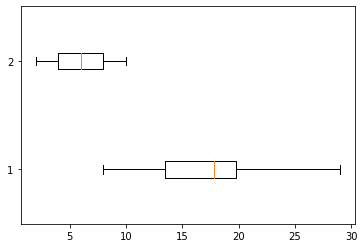

In [25]:
plt.boxplot(dt,vert=False) #with we can identify tha data have no outlier

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a1af708988>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a1af7270c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a1af730908>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a1af727208>}

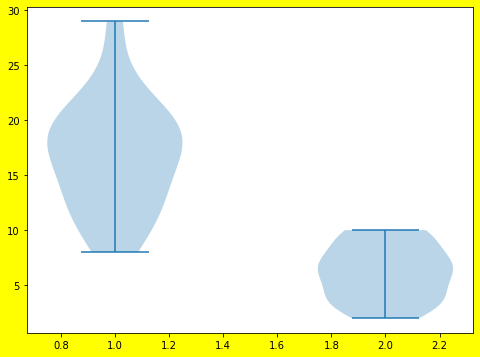

In [26]:
#Violin plot = with we can identify that high distribution 
plt.figure(figsize=(8,6),facecolor="yellow")
plt.violinplot(dt)

In [27]:
import seaborn as sns

<AxesSubplot:xlabel='DT', ylabel='ST'>

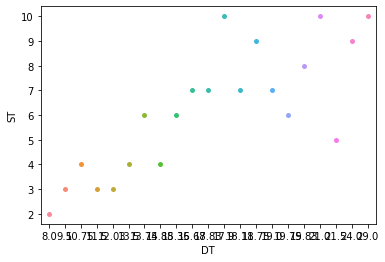

In [28]:
sns.swarmplot(x='DT',y='ST',data=dt)  #with this scatter plot we can find the data has moderate co-linearity

In [29]:
dt.corr() #there is co relation between delivery time and sorting time bcz close 1

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [30]:
lm = LinearRegression()

X = dt["ST"].values.reshape(-1,1)  # reshape(-1,1) it will covert into matrix (array)
Y = dt["DT"].values.reshape(-1,1)

reg_sklearn = lm.fit(X,Y)

In [31]:
print (reg_sklearn.coef_)
print (reg_sklearn.intercept_)

[[1.6490199]]
[6.58273397]


In [32]:
lm=smf.ols("DT~ST",data=dt).fit()

In [33]:
lm.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [34]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           3.98e-06
Time:                        10:53:06   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
lm2=smf.ols("DT~np.log(ST)",data=dt).fit()

In [36]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           2.64e-06
Time:                        10:53:12   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
lm3=smf.ols("np.log(DT)~ST",data=dt).fit()

In [38]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           1.59e-06
Time:                        10:53:19   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    R-square value is 0.711 .its a moderate co relation and delivert time can determine using sorting time 
    -> probability of error is 0.000 so we can say that this lm3 model will suitable for predicting delivery time

In [40]:
import statsmodels.api as sm


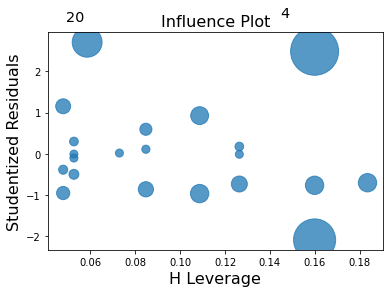

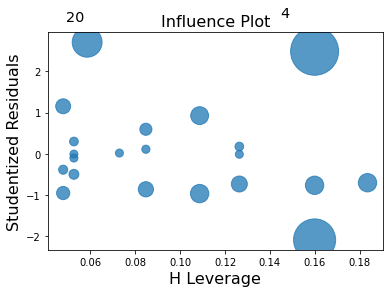

In [42]:
sm.graphics.influence_plot(lm)

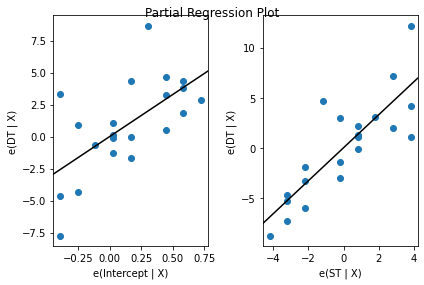

In [43]:
sm.graphics.plot_partregress_grid(lm)
plt.show()

In [44]:
lm.predict(dt)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64